In [215]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [216]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [218]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [219]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [220]:
df = pd.read_csv("data.csv")

In [221]:
df.head()

,text,label
0,"fell, persistant anterior/medial pain",knee
1,"pain on weight-bearing, tender suprapatellar a...",knee
2,"giving way, locking, swelling R knee",knee
3,medial meniscectomy and now locking knee? tear?,knee
4,ACL tear clinically,knee


In [222]:
df.loc[0].text

'fell, persistant anterior/medial pain'

In [223]:
df.dtypes

text     object
label    object
dtype: object

In [224]:
df.dtypes

text     object
label    object
dtype: object

c:\users\jorda\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

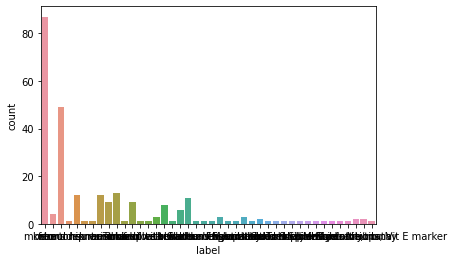

In [225]:
sns.countplot(df['label'])

In [226]:
df['label'].value_counts()

knee                                   87
shoulder                               49
ankle                                  13
hip                                    12
wrist                                  12
Tumour with Gad and Subtractions       11
tumour                                  9
foot                                    9
elbow                                   8
hand                                    6
femur                                   4
humerus                                 3
finger                                  3
achilles tendon                         3
Tumour + Subtractions, Vit E marker     2
tib/tib                                 2
sternum                                 2
sholder                                 1
Hand                                    1
multiple myeloma                        1
SI joint                                1
forearm                                 1
SI joints                               1
l-spine                           

<AxesSubplot:ylabel='Frequency'>

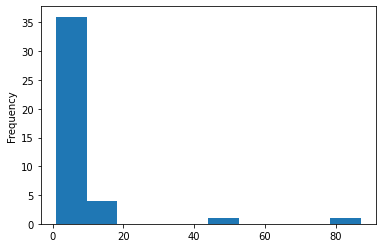

In [227]:
df['label'].value_counts().plot(kind="hist")

In [228]:
import neattext as nt
import neattext.functions as nfx

In [229]:
print(df["text"])
# Explore For Noise
df['text'].apply(lambda x:nt.TextFrame(x).noise_scan())

0                  fell, persistant anterior/medial pain
1      pain on weight-bearing, tender suprapatellar a...
2                   giving way, locking, swelling R knee
3        medial meniscectomy and now locking knee? tear?
4                                    ACL tear clinically
                             ...                        
255                  tibail plateau fracture, mri assess
256                                sarcoma rule out mass
257                                achilles rupture, mri
258                                    rule out myopathy
259                                   fratured phalange 
Name: text, Length: 260, dtype: object


0      {'text_noise': 5.405405405405405, 'text_length...
1      {'text_noise': 7.792207792207792, 'text_length...
2      {'text_noise': 5.555555555555555, 'text_length...
3      {'text_noise': 8.51063829787234, 'text_length'...
4      {'text_noise': 0, 'text_length': 19, 'noise_co...
                             ...                        
255    {'text_noise': 2.857142857142857, 'text_length...
256    {'text_noise': 4.761904761904762, 'text_length...
257    {'text_noise': 4.761904761904762, 'text_length...
258    {'text_noise': 5.88235294117647, 'text_length'...
259    {'text_noise': 0, 'text_length': 18, 'noise_co...
Name: text, Length: 260, dtype: object

In [230]:
# Explore For Noise
df['text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                  []
1      [on, a, while]
2                  []
3          [and, now]
4                  []
            ...      
255                []
256             [out]
257                []
258             [out]
259                []
Name: text, Length: 260, dtype: object

In [231]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [232]:
# Explore For Noise
df['text'].apply(nfx.remove_stopwords)

0                  fell, persistant anterior/medial pain
1      pain weight-bearing, tender suprapatellar area...
2                   giving way, locking, swelling R knee
3                medial meniscectomy locking knee? tear?
4                                    ACL tear clinically
                             ...                        
255                  tibail plateau fracture, mri assess
256                                    sarcoma rule mass
257                                achilles rupture, mri
258                                        rule myopathy
259                                    fratured phalange
Name: text, Length: 260, dtype: object

In [233]:
corpus = df['text'].apply(nfx.remove_stopwords)

In [234]:
tfidf = TfidfVectorizer()

In [235]:
tfidf

TfidfVectorizer()

In [236]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [237]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [238]:
df.head()

,text,label
0,"fell, persistant anterior/medial pain",knee
1,"pain on weight-bearing, tender suprapatellar a...",knee
2,"giving way, locking, swelling R knee",knee
3,medial meniscectomy and now locking knee? tear?,knee
4,ACL tear clinically,knee


In [239]:
y = df[["label"]]

In [240]:
# Split Data
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=65)

In [241]:
print(df['text'].shape)
print(X_train.shape)

(260,)
(182, 737)


In [242]:
import skmultilearn

dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

In [243]:
# #Descision tree model
# clf = DecisionTreeClassifier()
#
# # Train Decision Tree Classifer
# clf = clf.fit(X_train,y_train)
#
# #Predict the response for test dataset
# y_pred = clf.predict(X_test)
#
# print("Accuracy:",accuracy_score(y_test, y_pred))

In [244]:
# #Import Random Forest Model
# from sklearn.ensemble import RandomForestClassifier
#
# #Create a Gaussian Classifier
# clf=RandomForestClassifier()
#
# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)
#
# y_pred=clf.predict(X_test)

In [245]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [246]:
# vec_example = tfidf.transform(["foot"])
# prediction = clf.predict(vec_example)
# print(prediction)
# # print(y_pred)

In [247]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [248]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

TypeError: no supported conversion for types: (dtype('O'),)